In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


In [3]:
# OpenWeather API base url
url= "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list for weather data for each city
city_data = []
unit = "metric"

# Print status to logger
print("Beginning Data Retrieval")
print("----------------------------")

# Create counters
record_count= 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging puposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 0

    # Create endpoint url with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"

    # Log the url, record, and set numbers
    print("Processing Records %s of Set %s | %s" % (record_count, set_count, city))

    # add 1 to the record count
    record_count +=1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather

        # Append the City data to city_data list
        city_data.append({"City": city,
                          "Latitude": city_lat,
                          "Longitude": city_long,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # if an error is experienced, skip the city
    except:
        print(f"{city} not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that data loading is complete
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Records 1 of Set 1 | cidreira
Processing Records 2 of Set 1 | longyearbyen
Processing Records 3 of Set 1 | berezovyy
Processing Records 4 of Set 1 | port mathurin
Processing Records 5 of Set 1 | edinburgh of the seven seas
Processing Records 6 of Set 1 | taoudenni
Processing Records 7 of Set 1 | iskateley
Processing Records 8 of Set 1 | adamstown
Processing Records 9 of Set 1 | susuman
Processing Records 10 of Set 1 | curuca
Processing Records 11 of Set 1 | iqaluit
Processing Records 12 of Set 1 | grytviken
Processing Records 13 of Set 1 | vorgashor
Processing Records 14 of Set 1 | jamestown
Processing Records 15 of Set 1 | hermanus
Processing Records 16 of Set 1 | blackmans bay
Processing Records 17 of Set 1 | temirlanovka
Processing Records 18 of Set 1 | port-aux-francais
Processing Records 19 of Set 1 | badger
Processing Records 20 of Set 1 | bethel
Processing Records 21 of Set 1 | tura
Processing Records 22 of Set 1 |

In [4]:
# Convert the cities weather data to a pandas dataframe
city_data_df = pd.DataFrame(city_data)

# Show record count
city_data_df.count()

City          544
Latitude      544
Longitude     544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,26.58,78,1,5.75,BR,"{'coord': {'lon': -50.2056, 'lat': -30.1811}, ..."
1,longyearbyen,78.2186,15.6401,3.91,60,40,1.54,SJ,"{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'w..."
2,berezovyy,51.6667,135.7000,-21.14,99,100,1.19,RU,"{'coord': {'lon': 135.7, 'lat': 51.6667}, 'wea..."
3,port mathurin,-19.6833,63.4167,26.95,86,99,6.24,MU,"{'coord': {'lon': 63.4167, 'lat': -19.6833}, '..."
4,edinburgh of the seven seas,-37.0676,-12.3116,18.55,88,100,12.18,SH,"{'coord': {'lon': -12.3116, 'lat': -37.0676}, ..."


In [6]:
# Export the city_data to csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_saved_data = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_saved_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,26.58,78,1,5.75,BR,"{'coord': {'lon': -50.2056, 'lat': -30.1811}, ..."
1,longyearbyen,78.2186,15.6401,3.91,60,40,1.54,SJ,"{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'w..."
2,berezovyy,51.6667,135.7000,-21.14,99,100,1.19,RU,"{'coord': {'lon': 135.7, 'lat': 51.6667}, 'wea..."
3,port mathurin,-19.6833,63.4167,26.95,86,99,6.24,MU,"{'coord': {'lon': 63.4167, 'lat': -19.6833}, '..."
4,edinburgh of the seven seas,-37.0676,-12.3116,18.55,88,100,12.18,SH,"{'coord': {'lon': -12.3116, 'lat': -37.0676}, ..."


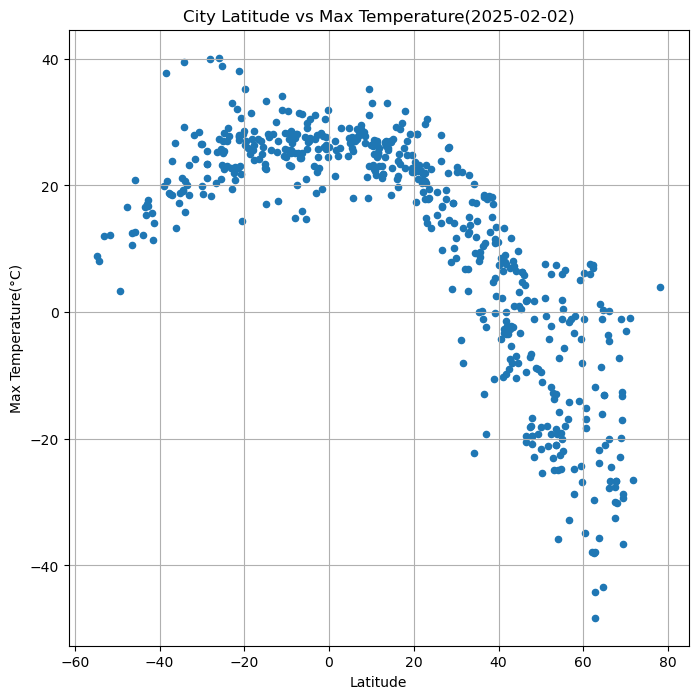

In [8]:
# Create scatter plot for latitude vs temperature
city_saved_data.plot(kind="scatter",x="Latitude",y="Max Temp", grid=True, figsize=(8,8), 
                  title=f"City Latitude vs Max Temperature(2025-02-02)")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

plt.show()

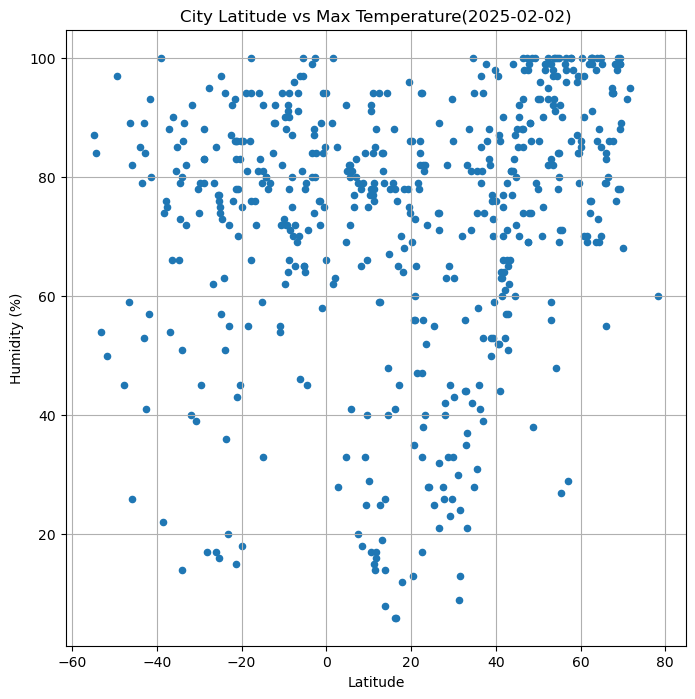

In [9]:
# Create scatter plot for latitude vs humidity
city_saved_data.plot(kind="scatter",x="Latitude",y="Humidity", grid=True, figsize=(8,8), 
                  title=f"City Latitude vs Max Temperature(2025-02-02)")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

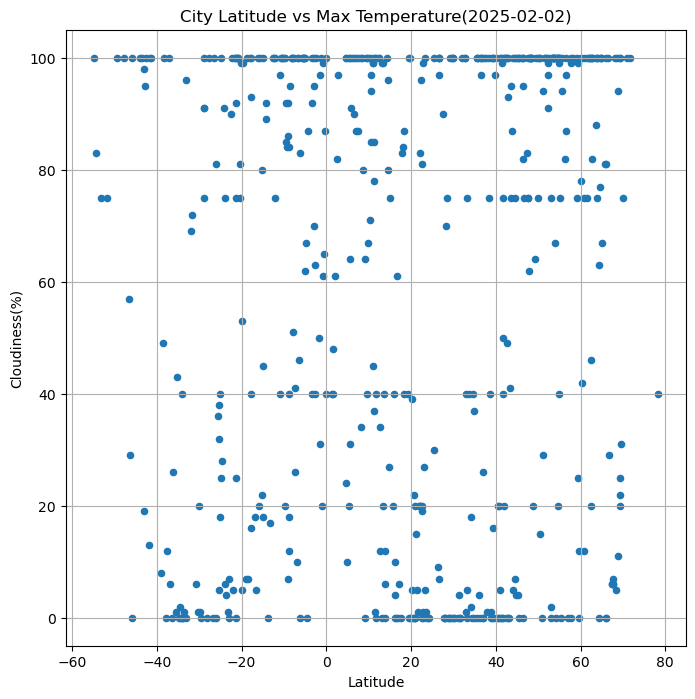

In [10]:
# Create scatter plot for latitude vs cloudiness
city_saved_data.plot(kind="scatter",x="Latitude",y="Cloudiness", grid=True, figsize=(8,8), 
                  title=f"City Latitude vs Max Temperature(2025-02-02)")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

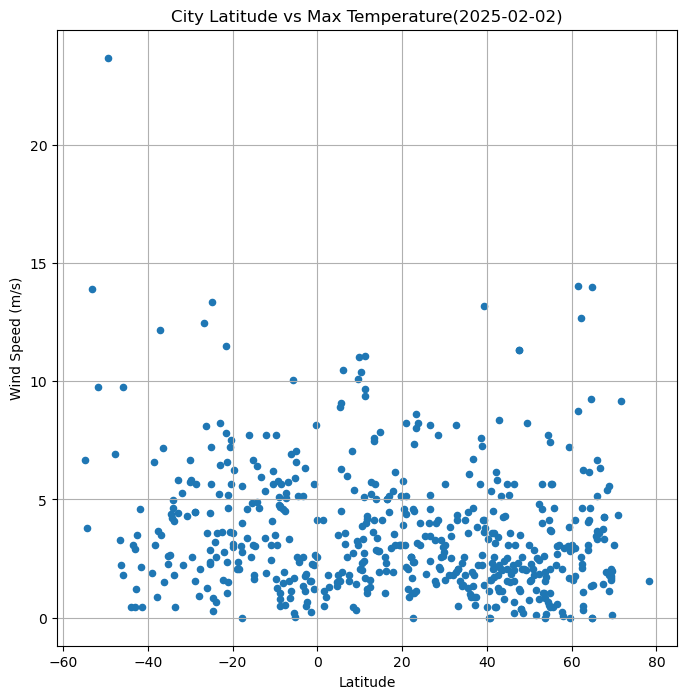

In [11]:
# Create scatter plot for latitude vs wind speed
city_saved_data.plot(kind="scatter",x="Latitude",y="Wind Speed", grid=True, figsize=(8,8), 
                  title=f"City Latitude vs Max Temperature(2025-02-02)")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.show()

In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_x, annotate_y):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Create regression line values
    regress_values = x_values * slope + intercept

    # Create the regression line
    line_eq = "y = "+ str(round(slope,2))+  "x + "+ str(round(intercept,2))

    # Plot scatter and regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, color="r")
    plt.annotate(line_eq, (annotate_x, annotate_y), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()


In [14]:
# Create a dataframe for the Northern Hemisphere data (Latitude >=0)
north_hemi_df = city_saved_data[city_saved_data["Latitude"] >=0]

# Display sample data
north_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,longyearbyen,78.2186,15.6401,3.91,60,40,1.54,SJ,"{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'w..."
2,berezovyy,51.6667,135.7000,-21.14,99,100,1.19,RU,"{'coord': {'lon': 135.7, 'lat': 51.6667}, 'wea..."
5,taoudenni,22.6783,-3.9836,17.93,17,0,4.52,ML,"{'coord': {'lon': -3.9836, 'lat': 22.6783}, 'w..."
6,iskateley,67.6803,53.1512,-26.73,94,6,4.25,RU,"{'coord': {'lon': 53.1512, 'lat': 67.6803}, 'w..."
8,susuman,62.7833,148.1667,-37.83,99,100,0.33,RU,"{'coord': {'lon': 148.1667, 'lat': 62.7833}, '..."


In [15]:
# Create a dataframe for the Southern Hemisphere data (Latitude <0)
south_hemi_df = city_saved_data[city_saved_data["Latitude"] <0]

# Display sample data
south_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,26.58,78,1,5.75,BR,"{'coord': {'lon': -50.2056, 'lat': -30.1811}, ..."
3,port mathurin,-19.6833,63.4167,26.95,86,99,6.24,MU,"{'coord': {'lon': 63.4167, 'lat': -19.6833}, '..."
4,edinburgh of the seven seas,-37.0676,-12.3116,18.55,88,100,12.18,SH,"{'coord': {'lon': -12.3116, 'lat': -37.0676}, ..."
7,adamstown,-25.0660,-130.1015,25.16,75,18,5.66,PN,"{'coord': {'lon': -130.1015, 'lat': -25.066}, ..."
9,curuca,-0.7289,-47.8481,25.80,84,99,1.20,BR,"{'coord': {'lon': -47.8481, 'lat': -0.7289}, '..."


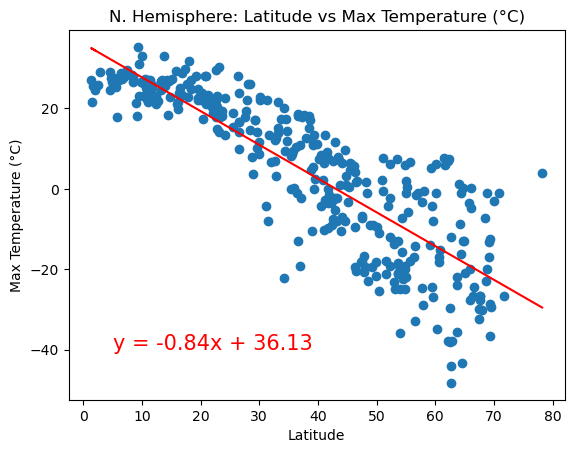

In [27]:
# Linear regressions for the Northern Hemisphere max temperature
plot_linear_regression(north_hemi_df["Latitude"], north_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)",
                       "N. Hemisphere: Latitude vs Max Temperature (°C)",annotate_x=5, annotate_y=-40)

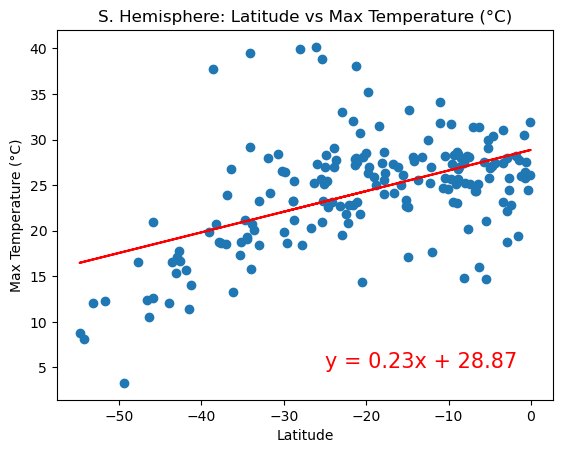

In [31]:
# Linear regressions for the Southern Hemisphere max temperature
plot_linear_regression(south_hemi_df["Latitude"], south_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)",
                       "S. Hemisphere: Latitude vs Max Temperature (°C)",annotate_x=-25, annotate_y=5)

Discussion about the linear relationship: For the northern hemisphere the linear regression shows a negative correlation between latitude and max temperature. The regression equation y= -0.84x + 36.13 indicates that for every 1-dgree increase in latitude the temperature decreases by .86°C. Cities with higher latitudes (in this case, higher latitudes are further from the equator and closer to the north pole) have colder temperatures.

For the southern hemisphere the linear regression shows a positive correlation between latitude and max temperature. The regression equation y= 0.23x + 28.87 indicates that for every 1-dgree increase in latitude the temperature increases by .23°C. Cities with higher latitudes (in this case, higher latitudes are closer to the equator and further from the south pole) have warmer temperatures.

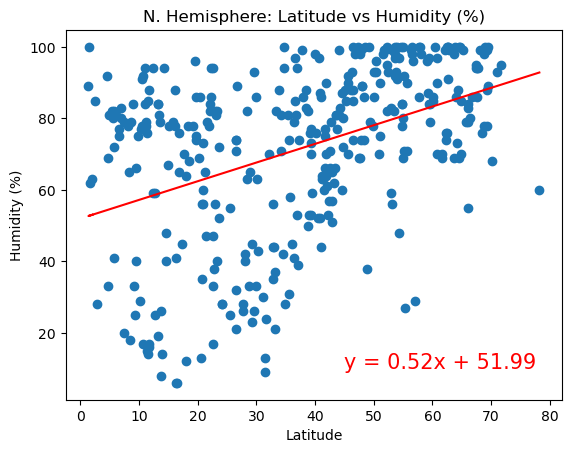

In [35]:
# Linear regressions for the Northern Hemisphere humidity
plot_linear_regression(north_hemi_df["Latitude"], north_hemi_df["Humidity"], "Latitude", "Humidity (%)",
                       "N. Hemisphere: Latitude vs Humidity (%)",annotate_x=45, annotate_y=10)

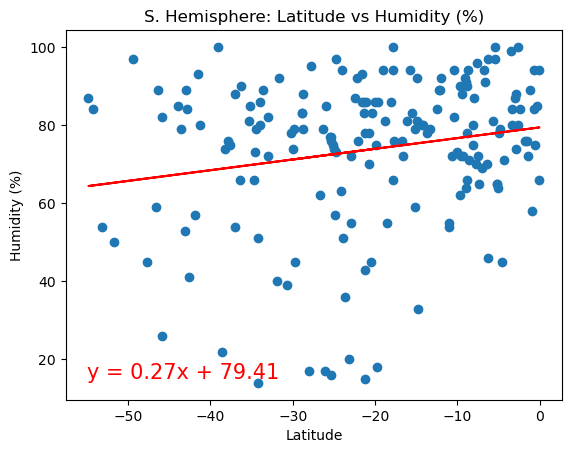

In [38]:
# Linear regressions for the Southern Hemisphere humidity
plot_linear_regression(south_hemi_df["Latitude"], south_hemi_df["Humidity"], "Latitude", "Humidity (%)",
                       "S. Hemisphere: Latitude vs Humidity (%)",annotate_x=-55, annotate_y=15)

Discussion about the linear relationship: For the northern hemisphere the linear regression shows a positive correlation between latitude and humidity. The regression equation y= 0.52x + 51.99 indicates that for every 1-dgree increase in latitude the humidity increases by 0.52%. Cities with higher latitudes (in this case, higher latitudes are further from the equator and closer to the north pole) have higher humidity.

For the southern hemisphere the linear regression shows a positive correlation between latitude and humidity. The regression equation y= 0.27x + 79.41 indicates that for every 1-dgree increase in latitude the humidity increases by .27%. Cities with higher latitudes (in this case, higher latitudes are closer to the equator and further from the south pole) have higher humidity.

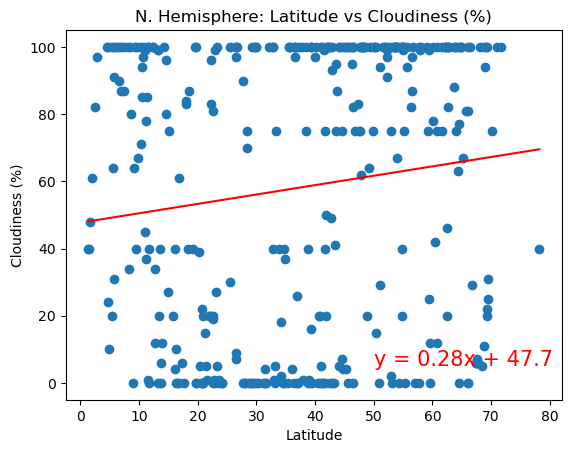

In [43]:
# Linear regressions for the Northern Hemisphere cloudiness
plot_linear_regression(north_hemi_df["Latitude"], north_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)",
                       "N. Hemisphere: Latitude vs Cloudiness (%)",annotate_x=50, annotate_y=5)

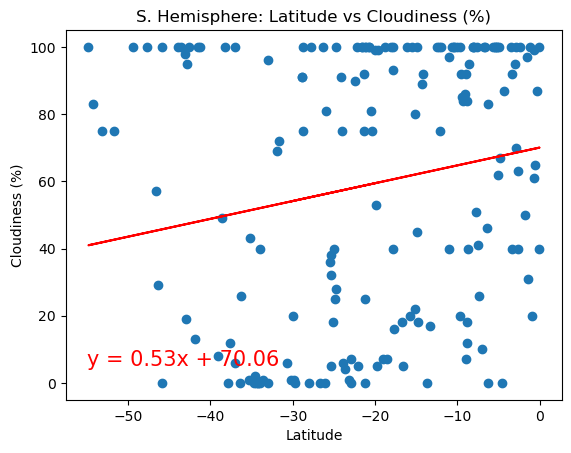

In [45]:
# Linear regressions for the Southern Hemisphere max temperature
plot_linear_regression(south_hemi_df["Latitude"], south_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)",
                       "S. Hemisphere: Latitude vs Cloudiness (%)",annotate_x=-55, annotate_y=5)

Discussion about the linear relationship: For the northern hemisphere the linear regression shows a positive correlation between latitude and cloudiness. The regression equation y= 0.28x + 47.7 indicates that for every 1-dgree increase in latitude the cloudiness increases by 0.28%. Cities with higher latitudes (in this case, higher latitudes are further from the equator and closer to the north pole) have higher cloudiness.

For the southern hemisphere the linear regression shows a positive correlation between latitude and cloudiness. The regression equation y= 0.53x + 70.06 indicates that for every 1-dgree increase in latitude the cloudiness increases by .53%. Cities with higher latitudes (in this case, higher latitudes are closer to the equator and further from the south pole) have higher cloudiness.

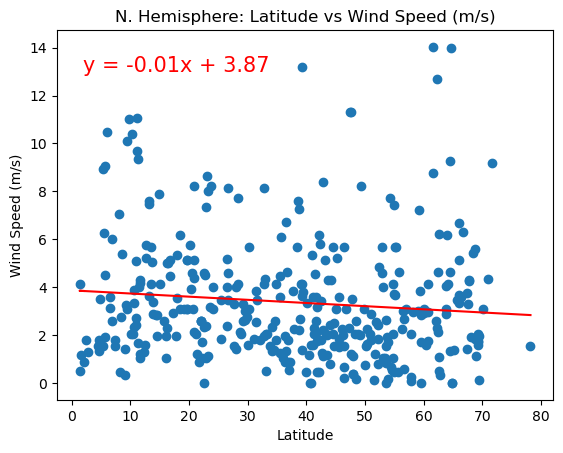

In [48]:
# Linear regressions for the Northern Hemisphere max temperature
plot_linear_regression(north_hemi_df["Latitude"], north_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",
                       "N. Hemisphere: Latitude vs Wind Speed (m/s)",annotate_x=2, annotate_y=13)

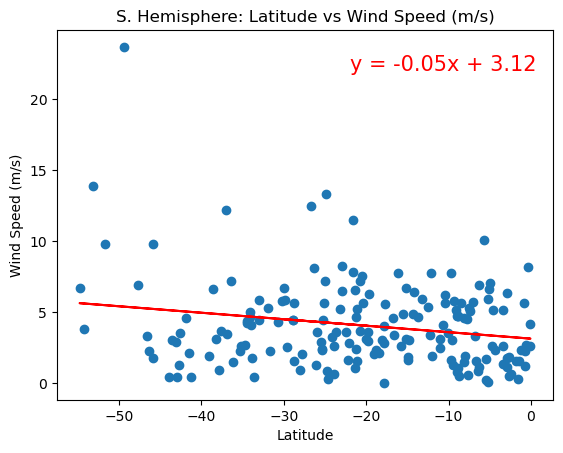

In [53]:
# Linear regressions for the Southern Hemisphere max temperature
plot_linear_regression(south_hemi_df["Latitude"], south_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",
                       "S. Hemisphere: Latitude vs Wind Speed (m/s)",annotate_x=-22, annotate_y=22)

Discussion about the linear relationship: For the northern hemisphere the linear regression shows a weak negative correlation between latitude and wind speed. The regression equation y= -0.01x + 3.87 indicates that for every 1-dgree increase in latitude the wind speed decreases by 0.01m/s. The coorelation is very weak and may indicate no pratical relationship between the variables.

For the southern hemisphere the linear regression shows a similar weak negative correlation between latitude and wind speed. The regression equation y= -0.05x + 3.12 indicates that for every 1-dgree increase in latitude the wind speed decreases by .05m/s. The coorelation is very weak and may indicate no pratical relationship between the variables.